In [15]:
import plotly
import numpy as np

plotly.__version__

'3.8.1'

In [16]:
# 오프라인
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

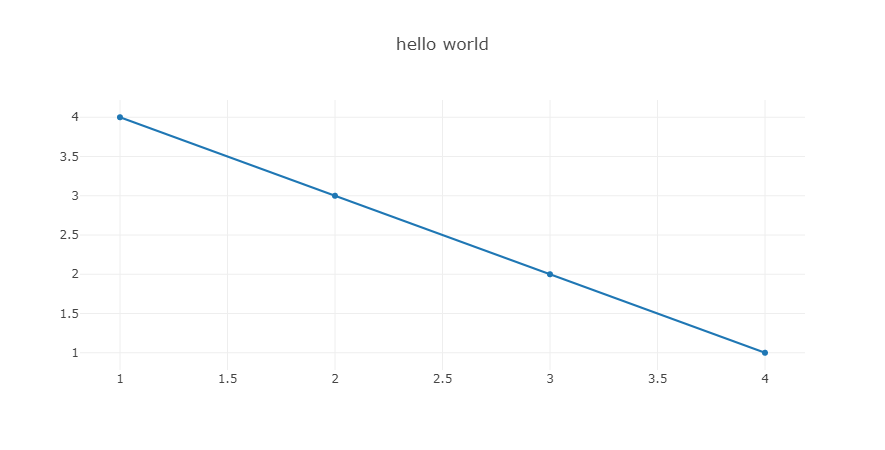

In [3]:
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})

In [10]:
help(plotly.offline.iplot)

Help on function iplot in module plotly.offline.offline:

iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)
    Draw plotly graphs inside an IPython or Jupyter notebook
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples of
                      graph descriptions.
    
    Keyword arguments:
    show_link (default=False) -- display a link in the bottom-right corner of
                                of the chart that will export the chart to
                                Plotly Cloud or Plotly Enterprise
    link_text (default='Export to plot.ly') -- the text of export link
    validate (default=True) -- validate that all of the keys in the figure
                          

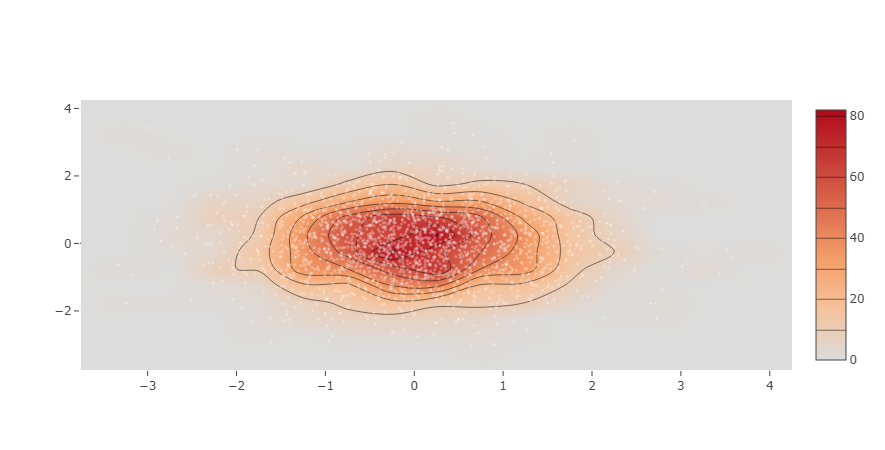

In [4]:
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

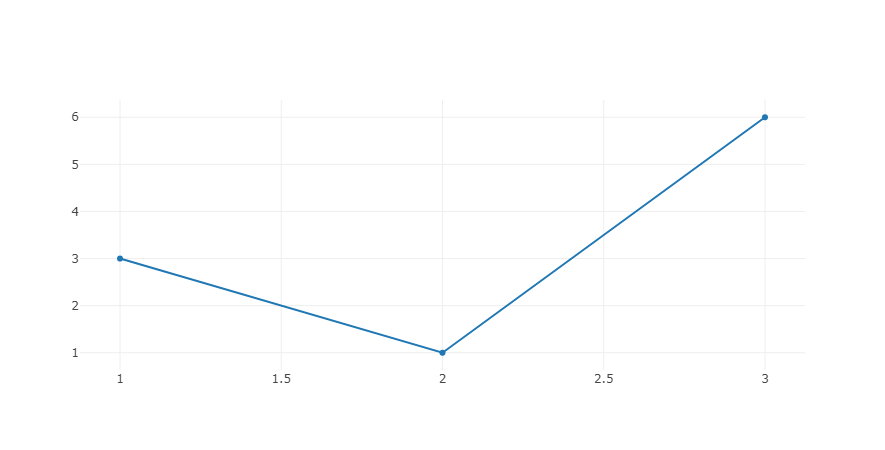

In [5]:
iplot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

# 이제 time series 와 함께

In [10]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.2'

In [ ]:
# 온라인
#import plotly.plotly as py
#plotly.tools.set_credentials_file(username='indiesoul', api_key='p9yYj2EBxZ6yXq9lq56e')

In [11]:
df = fdr.DataReader("251270", "2016")

In [12]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-05-12,165000,171500,157000,162000,6368916,NaN
2017-05-15,159000,165500,158000,160000,1504154,-0.012346
2017-05-16,161500,162500,156000,156000,1146762,-0.025000
2017-05-17,153000,154500,142000,144000,2006418,-0.076923
2017-05-18,144000,149500,142000,148000,1587826,0.027778


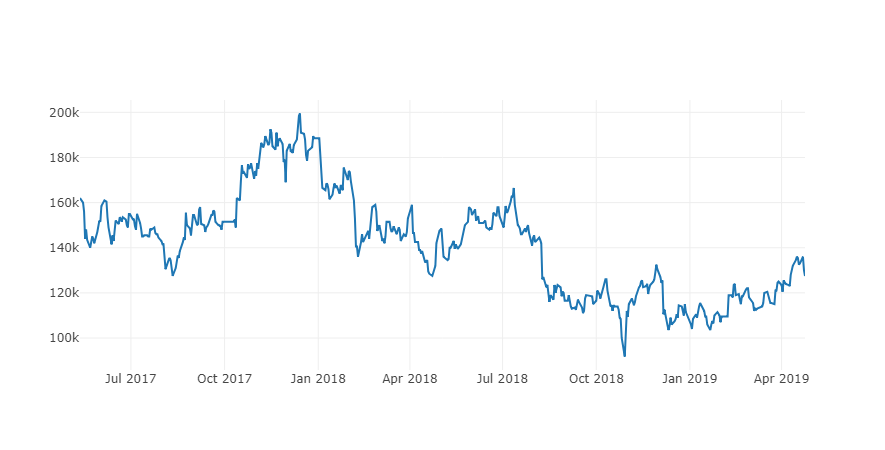

In [9]:
import pandas as pd
from datetime import datetime

data = [go.Scatter(x=df.index, y=df['Close'])]

iplot(data, filename = 'time-series-simple')

# OHLC, Candlestick 챠트

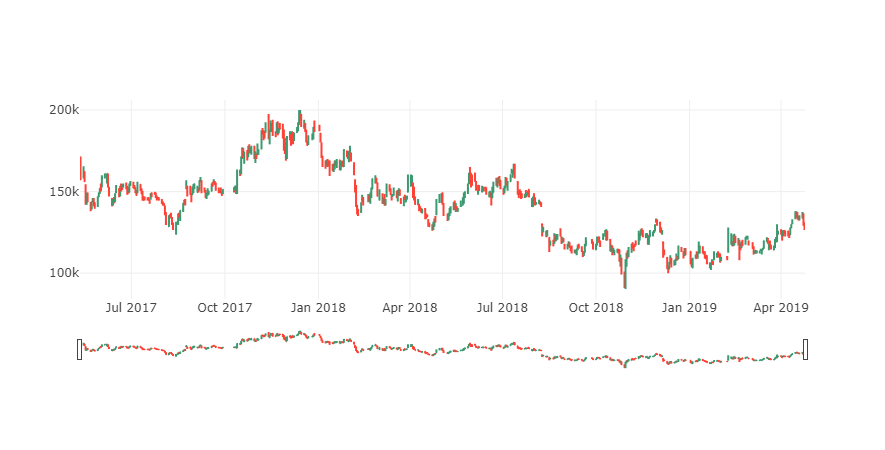

In [18]:
trace = go.Ohlc(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
data = [trace]
iplot(data, filename='simple_candlestick')

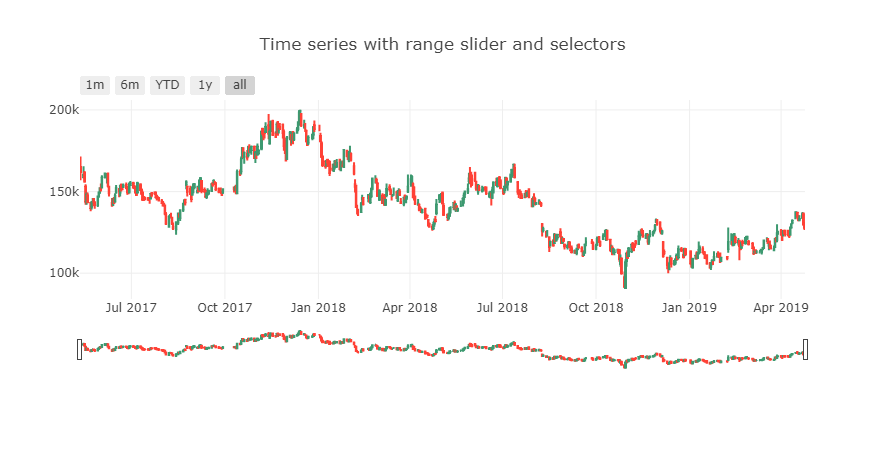

In [20]:
trace1 = go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
data = [trace1]
layout = dict(
    title='Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
fig = dict(data=data, layout=layout)
iplot(fig, filename='simple_candlestick')

# Update Button

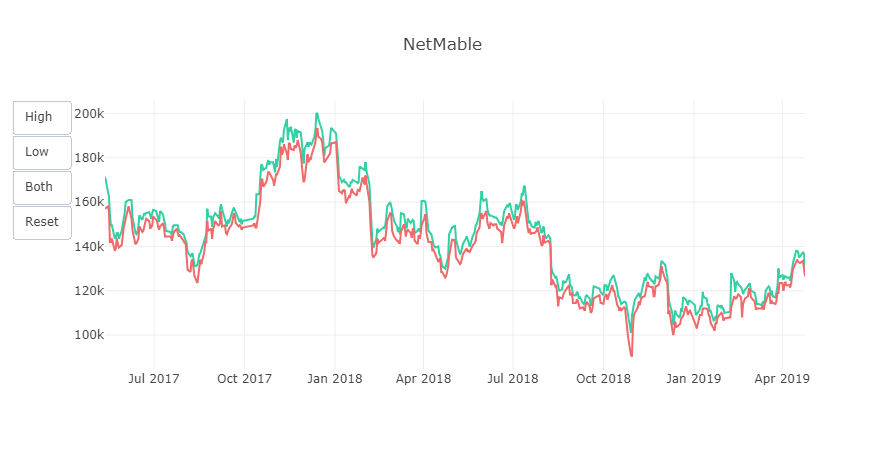

In [22]:
trace_high = go.Scatter(x=list(df.index),
                        y=list(df.High),
                        name='High',
                        line=dict(color='#33CFA5'))

trace_high_avg = go.Scatter(x=list(df.index),
                            y=[df.High.mean()]*len(df.index),
                            name='High Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

trace_low = go.Scatter(x=list(df.index),
                       y=list(df.Low),
                       name='Low',
                       line=dict(color='#F06A6A'))

trace_low_avg = go.Scatter(x=list(df.index),
                           y=[df.Low.mean()]*len(df.index),
                           name='Low Average',
                           visible=False,
                           line=dict(color='#F06A6A', dash='dash'))

data = [trace_high, trace_high_avg, trace_low, trace_low_avg]

high_annotations=[dict(x='2017-12-08',
                       y=df.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df.High.idxmax(),
                       y=df.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(df.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2018-10-31',
                      y=df.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(df.Low.mean()),
                      ax=0, ay=40),
                 dict(x=df.High.idxmin(),
                      y=df.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(df.Low.min()),
                      ax=0, ay=40)]

updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
        ]),
    )
])

layout = dict(title='NetMable', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig, filename='update_button')